In [ ]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/AI Level 6/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/AI Level 6/DevanagariHandwrittenDigitDataset/Test"

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


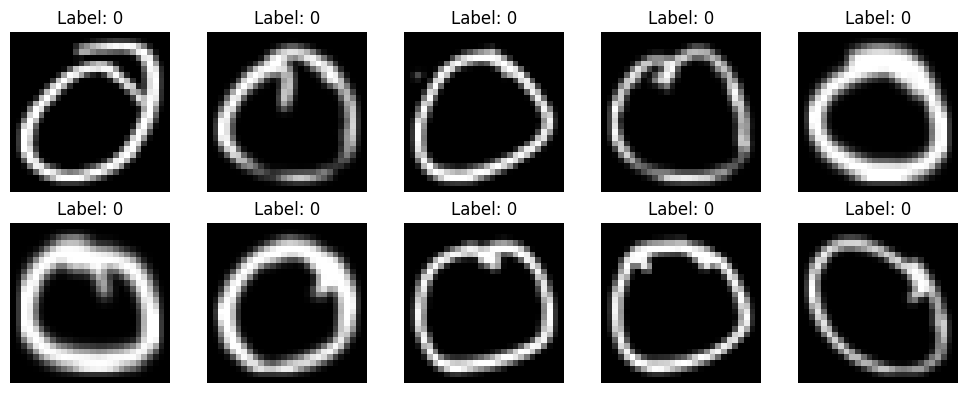

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))
            img = np.array(img) / 255.0

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
def build_functional_model():
  # Input layer
  inputs = keras.Input(shape=input_shape)
  # Flatten layer
  x = keras.layers.Flatten()(inputs)
  # Hidden layers
  x = keras.layers.Dense(64, activation="sigmoid")(x)
  x = keras.layers.Dense(128, activation="sigmoid")(x)
  x = keras.layers.Dense(256, activation="sigmoid")(x)
  # Output layer
  outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
  # Create model
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model
 # Build the model
functional_model = build_functional_model()
functional_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
functional_model.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
batch_size = 128
epochs = 250
# Callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2 ),
    ]
 # Train the model with callbacks and validation split
history = functional_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=callbacks,
 )

Epoch 1/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4885 - loss: 1.5779 - val_accuracy: 0.8967 - val_loss: 0.3623
Epoch 2/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9043 - loss: 0.3420 - val_accuracy: 0.9277 - val_loss: 0.2461
Epoch 3/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9321 - loss: 0.2339 - val_accuracy: 0.9427 - val_loss: 0.1991
Epoch 4/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9479 - loss: 0.1832 - val_accuracy: 0.9522 - val_loss: 0.1702
Epoch 5/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9560 - loss: 0.1525 - val_accuracy: 0.9555 - val_loss: 0.1508
Epoch 6/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9635 - loss: 0.1245 - val_accuracy: 0.9592 - val_loss: 0.1383
Epoch 7/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9679 - loss: 0.1111 - val_accuracy: 0.9623 - val_loss: 0.1287
Epoch 8/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9723 - loss: 0.0965 - val_a

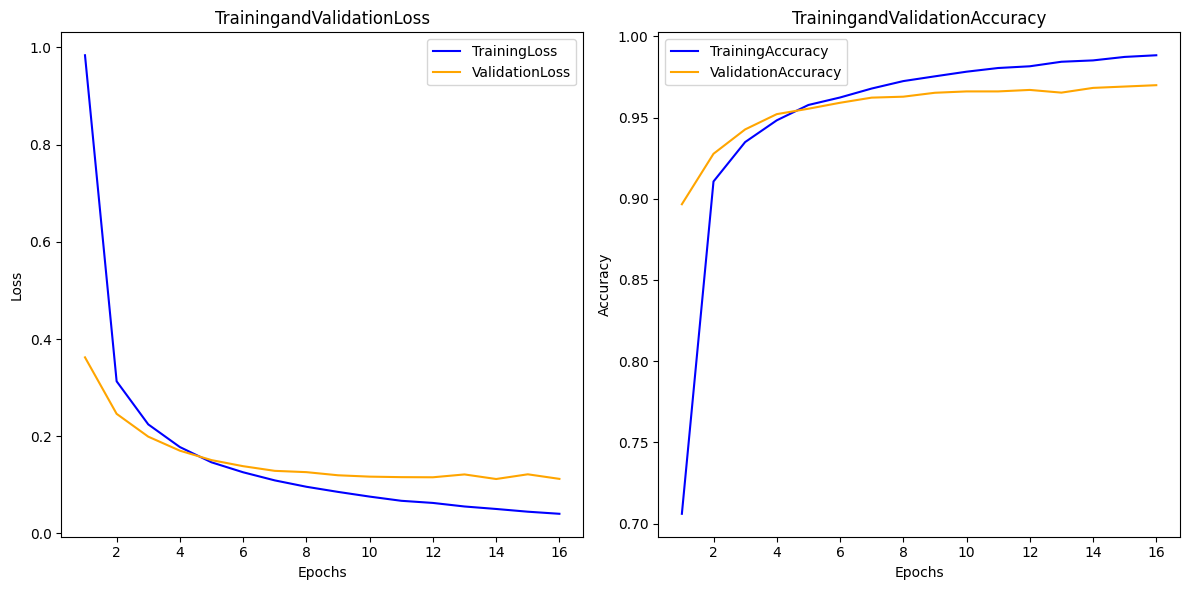

In [ ]:
 import matplotlib.pyplot as plt

 #Extractingtrainingandvalidationloss
 train_loss=history.history["loss"]
 val_loss=history.history["val_loss"]
 #Extractingtrainingandvalidationaccuracy(ifmetricswerespecified)
 train_acc=history.history["accuracy"]
 val_acc=history.history["val_accuracy"]
 #Plottingtrainingandvalidationloss
 plt.figure(figsize=(12, 6))
 plt.subplot(1, 2, 1)
 plt.plot(range(1, len(train_loss) +1), train_loss, label="TrainingLoss",color="blue")
 plt.plot(range(1, len(val_loss) +1), val_loss, label="ValidationLoss",color="orange")
 plt.xlabel("Epochs")
 plt.ylabel("Loss")
 plt.title("TrainingandValidationLoss")
 plt.legend()
 #Plottingtrainingandvalidationaccuracy
 plt.subplot(1, 2, 2)
 plt.plot(range(1, len(train_acc)+1), train_acc,label="TrainingAccuracy", color="blue")
 plt.plot(range(1, len(val_acc)+1),val_acc,label="ValidationAccuracy",color="orange")
 plt.xlabel("Epochs")
 plt.ylabel("Accuracy")
 plt.title("TrainingandValidationAccuracy")
 plt.legend()
 plt.tight_layout()
 plt.show()

In [ ]:
predictions = functional_model.predict(x_test)
predicted_labels = np.argmax(predictions, axis = 1)
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first image: 7
True label for first image: 7


In [ ]:
functional_model.save('SabinShrestha_Workshop4.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('SabinShrestha_Workshop4.h5')